### Exploring Customer Segmentation

In this activity, you are tasked with profiling customer groups for a large telecommunications company.  The data provided contains information on customers purchasing and useage behavior with the telecom products.  Your goal is to use PCA and clustering to segment these customers into meaningful groups, and report back your findings.  

Because these results need to be interpretable, it is important to keep the number of clusters reasonable.  Think about how you might represent some of the non-numeric features so that they can be included in your segmentation models.  You are to report back your approach and findings to the class.  Be specific about what features were used and how you interpret the resulting clusters.

## Introduction
This notebook explores customer segmentation for a telecommunications company using Principal Component Analysis (PCA) and clustering techniques. We'll analyze customer data to identify meaningful segments based on purchasing and usage behavior. The goal is to create interpretable customer groups that can inform business strategies and marketing efforts.

## Library Imports
In this section, we import all the necessary libraries for our analysis:
- **matplotlib.pyplot and seaborn**: For data visualization
- **numpy and pandas**: For data manipulation and analysis
- **plotly.express**: For interactive visualizations
- **sklearn.cluster**: For KMeans and DBSCAN clustering algorithms
- **sklearn.decomposition**: For Principal Component Analysis (PCA)
- **sklearn.preprocessing**: For data preprocessing (StandardScaler, OrdinalEncoder, LabelEncoder)


In [122]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px 
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder

## Data Loading and Exploration
In this section, we load the telecommunications customer data from a CSV file and perform initial exploratory data analysis to understand the dataset's structure and content.


In [123]:
# Load the telecommunications customer data
df = pd.read_csv('data/telco_churn_data.csv')


### Data Preview
Let's examine the first few rows of the dataset to understand its structure.


In [124]:
# Display the first 5 rows of the dataset
df.head()


,Customer ID,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,...,Latitude,Longitude,Population,Churn Value,CLTV,Churn Category,Churn Reason,Total Customer Svc Requests,Product/Service Issues Reported,Customer Satisfaction
0,8779-QRDMV,No,0,1,NaN,No,0.00,No,Yes,Fiber Optic,...,34.023810,-118.156582,68701,1,5433,Competitor,Competitor offered more data,5,0,NaN
1,7495-OOKFY,Yes,1,8,Offer E,Yes,48.85,Yes,Yes,Cable,...,34.044271,-118.185237,55668,1,5302,Competitor,Competitor made better offer,5,0,NaN
2,1658-BYGOY,No,0,18,Offer D,Yes,11.33,Yes,Yes,Fiber Optic,...,34.108833,-118.229715,47534,1,3179,Competitor,Competitor made better offer,1,0,NaN
3,4598-XLKNJ,Yes,1,25,Offer C,Yes,19.76,No,Yes,Fiber Optic,...,33.936291,-118.332639,27778,1,5337,Dissatisfaction,Limited range of services,1,1,2.0
4,4846-WHAFZ,Yes,1,37,Offer C,Yes,6.33,Yes,Yes,Cable,...,33.972119,-118.020188,26265,1,2793,Price,Extra data charges,1,0,2.0


### Data Information
Now we'll check the data types and missing values in our dataset.


In [125]:
# Display information about the dataset (data types, non-null values)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 46 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Referred a Friend                  7043 non-null   object 
 2   Number of Referrals                7043 non-null   int64  
 3   Tenure in Months                   7043 non-null   int64  
 4   Offer                              3166 non-null   object 
 5   Phone Service                      7043 non-null   object 
 6   Avg Monthly Long Distance Charges  7043 non-null   float64
 7   Multiple Lines                     7043 non-null   object 
 8   Internet Service                   7043 non-null   object 
 9   Internet Type                      5517 non-null   object 
 10  Avg Monthly GB Download            7043 non-null   int64  
 11  Online Security                    7043 non-null   objec

### Statistical Summary
Let's examine the statistical summary of the numerical features in our dataset.


In [126]:
# Generate descriptive statistics of the dataset
df.describe()

,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Regular Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Age,Number of Dependents,Zip Code,Latitude,Longitude,Population,Churn Value,CLTV,Total Customer Svc Requests,Product/Service Issues Reported,Customer Satisfaction
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,1834.000000
mean,1.951867,32.386767,22.958954,21.110890,65.538800,2280.381264,1.962182,278.499225,749.099262,46.509726,0.468692,93486.070567,36.197455,-119.756684,22139.603294,0.265370,4400.295755,1.338776,0.308107,3.005453
std,3.001199,24.542061,15.448113,20.948471,30.606805,2266.220462,7.902614,685.039625,846.660055,16.750352,0.962802,1856.767505,2.468929,2.154425,21152.392837,0.441561,1183.057152,1.430471,0.717514,1.256938
min,0.000000,1.000000,0.000000,0.000000,18.250000,18.800000,0.000000,0.000000,0.000000,19.000000,0.000000,90001.000000,32.555828,-124.301372,11.000000,0.000000,2003.000000,0.000000,0.000000,1.000000
25%,0.000000,9.000000,9.210000,3.000000,35.890000,400.150000,0.000000,0.000000,70.545000,32.000000,0.000000,92101.000000,33.990646,-121.788090,2344.000000,0.000000,3469.000000,0.000000,0.000000,2.000000
50%,0.000000,29.000000,22.890000,17.000000,71.968000,1394.550000,0.000000,0.000000,401.440000,46.000000,0.000000,93518.000000,36.205465,-119.595293,17554.000000,0.000000,4527.000000,1.000000,0.000000,3.000000
75%,3.000000,55.000000,36.395000,28.000000,90.650000,3786.600000,0.000000,182.620000,1191.100000,60.000000,0.000000,95329.000000,38.161321,-117.969795,36125.000000,1.000000,5380.500000,2.000000,0.000000,4.000000
max,11.000000,72.000000,49.990000,94.000000,123.084000,8684.800000,49.790000,6477.000000,3564.720000,80.000000,9.000000,96150.000000,41.962127,-114.192901,105285.000000,1.000000,6500.000000,9.000000,6.000000,5.000000


## Target Variable Identification
Here we identify the target variable for our analysis, which is 'Churn Value'. This variable indicates whether a customer has churned (left the company) or not.


In [127]:
# Define the target variable
txt_target_var = 'Churn Value'

# Check the unique values of the target variable
print(df[txt_target_var].unique()) # this is the target variable

# Extract the target column for later use
target_column = df[[txt_target_var]]

# Preview the target column
target_column.head()


[1 0]


,Churn Value
0,1
1,1
2,1
3,1
4,1


## Principal Component Analysis (PCA) Preparation
In this section, we prepare for Principal Component Analysis (PCA) by selecting appropriate features.

For PCA inputs, we focus on numeric continuous variables. Likert Scale variables (scales 1-5, 1-9) with values like 1 = 'Strongly Agree' and 5 = 'Strongly Disagree' are not optimal for PCA inputs because:
1. These are technically ordered categories rather than continuous variables
2. The categories don't have qualitative differences
3. They represent discrete measurements about an underlying continuum

While there's no perfect alternative for handling Likert Scale items in PCA, focusing on truly continuous variables provides more reliable results.

## Feature Selection for PCA
Here we define a list of continuous numerical features that will be used as inputs for our PCA model. These features represent various aspects of customer behavior and demographics.


In [128]:
# Define the list of features for PCA
pca_list = [
    'Number of Referrals',
    'Tenure in Months',
    'Avg Monthly Long Distance Charges',
    'Avg Monthly GB Download',
    'Monthly Charge',
    'Total Regular Charges',
    'Total Refunds',
    'Total Extra Data Charges',
    'Total Long Distance Charges',
    'Age',
    'Number of Dependents',
    'Population', 
    'CLTV',
    'Total Customer Svc Requests', 
    'Product/Service Issues Reported'
]

# Preview the selected features
df[pca_list].head(3)


,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Regular Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Age,Number of Dependents,Population,CLTV,Total Customer Svc Requests,Product/Service Issues Reported
0,0,1,0.00,9,41.236,39.65,0.00,0.0,0.00,78,0,68701,5433,5,0
1,1,8,48.85,19,83.876,633.30,0.00,120.0,390.80,74,1,55668,5302,5,0
2,0,18,11.33,57,99.268,1752.55,45.61,0.0,203.94,71,3,47534,3179,1,0


## PCA Implementation
Now we'll implement PCA on our selected features. First, we need to standardize the data since PCA is sensitive to the scale of the features. Then we'll fit the PCA model with 14 components (equal to the number of features) to examine the explained variance.


In [129]:
# Extract the features for PCA
X = df[pca_list]

# Standardize the data (mean=0, variance=1) for PCA
df_scaled = StandardScaler().fit_transform(X)

# Fit PCA with 14 components (equal to the number of features)
pca = PCA(n_components = 14, random_state = 42).fit(df_scaled)

## PCA Visualization and Component Selection
To determine how many principal components to keep, we'll create two important visualizations:
1. **Scree Plot**: Shows the explained variance ratio for each principal component
2. **Cumulative Variance Plot**: Shows the cumulative explained variance as we add more components

These plots will help us decide how many components to retain for our analysis while preserving most of the variance in the data.


### Scree Plot
The scree plot shows the explained variance ratio for each principal component. We look for an "elbow" point where adding more components provides diminishing returns.


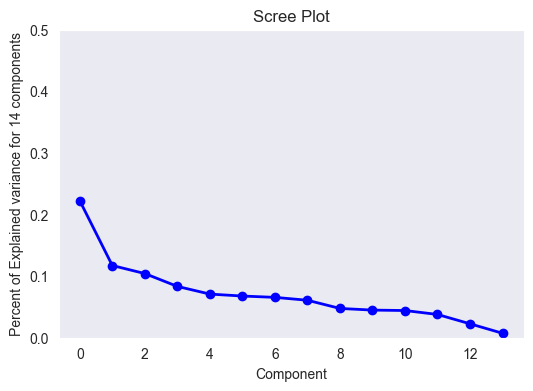

In [130]:
# Create a scree plot to visualize the explained variance of each component
fig, ax = plt.subplots(figsize = (6, 4))

# Plot the explained variance ratio for each component
ax.plot(pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')

# Set plot labels and title
ax.set(
    xlabel = 'Component',
    ylabel = 'Percent of Explained variance for 14 components',
    title = 'Scree Plot',
    ylim = (0,.5)    
      );

ax.grid()


### Cumulative Variance Plot
The cumulative variance plot shows how much of the total variance is explained as we add more components. This helps us determine how many components to keep to preserve a desired amount of variance (typically 70-90%).


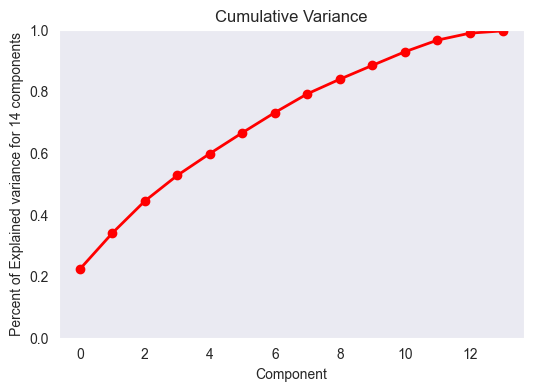

In [131]:
# Create a cumulative variance plot
fig, ax = plt.subplots(figsize = (6, 4))

# Plot the cumulative explained variance
ax.plot(np.cumsum(pca.explained_variance_ratio_),  'o-', linewidth=2, color='red')

# Set plot labels and title
ax.set(
    xlabel = 'Component',
    ylabel = 'Percent of Explained variance for 14 components',
    title = 'Cumulative Variance',
    ylim = (0,1)
      );

ax.grid()


## Component Selection Decision
Based on the scree plot and cumulative variance plot, we'll keep 5 principal components (PC0 through PC4). These 5 components explain approximately 60% of the total variance in the data, which provides a good balance between dimensionality reduction and information preservation.


In [132]:
# Apply PCA with 5 components based on our analysis
pca_5 = PCA(n_components = 5, random_state = 42).fit_transform(df_scaled)

# Check the shape of the transformed data (number of samples × number of components)
print(pca_5.shape)

(7043, 5)


## Categorical Data Transformation
To use categorical variables in our clustering models, we need to transform them into numerical values. We'll use Label Encoding to convert categorical variables into numeric representations.


In [133]:
# Define a function to transform categorical variables using LabelEncoder
def transformation_YES_NO(dataframe, columns_list):
    for i in columns_list:    
        # Fit and transform each categorical column
        temp_encoder = LabelEncoder().fit(dataframe[i])
        dataframe[i] = temp_encoder.fit_transform(dataframe[i])

        # Print information about the transformation for verification
        print('Feature transformed: '+ str(i))
        print('Classes: '+ str(temp_encoder.classes_))
        print('Transformations:' + str( temp_encoder.fit_transform(temp_encoder.classes_)) + '\n---------------\n')

    return dataframe


### Identifying Categorical Variables
Now we'll identify all categorical variables in our dataset, including object types and any ordinal variables like Customer Satisfaction.


In [134]:
# Get all columns with object data type
text_categories = df.select_dtypes(include= ['object']).columns.values

# Add Customer Satisfaction which is an ordinal variable but stored as numeric
text_categories = np.append(text_categories, 'Customer Satisfaction')

# Print the type and list of categorical variables
print(type(text_categories))
print(text_categories)


<class 'numpy.ndarray'>
['Customer ID' 'Referred a Friend' 'Offer' 'Phone Service'
 'Multiple Lines' 'Internet Service' 'Internet Type' 'Online Security'
 'Online Backup' 'Device Protection Plan' 'Premium Tech Support'
 'Streaming TV' 'Streaming Movies' 'Streaming Music' 'Unlimited Data'
 'Contract' 'Paperless Billing' 'Payment Method' 'Gender' 'Under 30'
 'Senior Citizen' 'Married' 'Dependents' 'City' 'Churn Category'
 'Churn Reason' 'Customer Satisfaction']


### Applying Categorical Transformation
We'll apply our transformation function to convert all categorical variables to numeric, then clean up the dataset by removing unnecessary columns.


In [135]:
# Apply the transformation function to all categorical variables
df_cat_transformed = transformation_YES_NO(df, columns_list=text_categories)

# Remove unnecessary columns (ID, City, target variable) and PCA input features
# We remove PCA input features because we'll use the PCA components instead
df_cat_transformed = df_cat_transformed.drop(['Customer ID', 'City', txt_target_var], axis=1).drop(pca_list, axis=1)


Feature transformed: Customer ID
Classes: ['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
Transformations:[   0    1    2 ... 7040 7041 7042]
---------------

Feature transformed: Referred a Friend
Classes: ['No' 'Yes']
Transformations:[0 1]
---------------

Feature transformed: Offer
Classes: ['Offer A' 'Offer B' 'Offer C' 'Offer D' 'Offer E' nan]
Transformations:[0 1 2 3 4 5]
---------------

Feature transformed: Phone Service
Classes: ['No' 'Yes']
Transformations:[0 1]
---------------

Feature transformed: Multiple Lines
Classes: ['No' 'Yes']
Transformations:[0 1]
---------------

Feature transformed: Internet Service
Classes: ['No' 'Yes']
Transformations:[0 1]
---------------

Feature transformed: Internet Type
Classes: ['Cable' 'DSL' 'Fiber Optic' nan]
Transformations:[0 1 2 3]
---------------

Feature transformed: Online Security
Classes: ['No' 'Yes']
Transformations:[0 1]
---------------

Feature transformed: Online Backup
Classes: ['No' 'Yes

In [136]:
# Check the structure of the transformed categorical data
df_cat_transformed.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Referred a Friend       7043 non-null   int64  
 1   Offer                   7043 non-null   int64  
 2   Phone Service           7043 non-null   int64  
 3   Multiple Lines          7043 non-null   int64  
 4   Internet Service        7043 non-null   int64  
 5   Internet Type           7043 non-null   int64  
 6   Online Security         7043 non-null   int64  
 7   Online Backup           7043 non-null   int64  
 8   Device Protection Plan  7043 non-null   int64  
 9   Premium Tech Support    7043 non-null   int64  
 10  Streaming TV            7043 non-null   int64  
 11  Streaming Movies        7043 non-null   int64  
 12  Streaming Music         7043 non-null   int64  
 13  Unlimited Data          7043 non-null   int64  
 14  Contract                7043 non-null   

## Alternative PCA Approach (Optional)
As an alternative approach, we'll also explore applying PCA to all features (both the original numeric features and the transformed categorical features). This allows us to compare the results with our primary approach that used only continuous variables for PCA.


In [137]:
# Combine the transformed categorical data with the original numeric features
df_inputs_all = df_cat_transformed.reset_index().merge(X.reset_index(),
                                                       on = 'index',
                                                       how = 'inner'
                                                      ).set_index('index')
# Preview the combined dataset
df_inputs_all.head()


,Referred a Friend,Offer,Phone Service,Multiple Lines,Internet Service,Internet Type,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,...,Total Regular Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Age,Number of Dependents,Population,CLTV,Total Customer Svc Requests,Product/Service Issues Reported
index,,,,,,,,,,,,,,,,,,,,,
0,0,5,0,0,1,2,0,0,1,0,...,39.65,0.00,0.0,0.00,78,0,68701,5433,5,0
1,1,4,1,1,1,0,0,1,0,0,...,633.30,0.00,120.0,390.80,74,1,55668,5302,5,0
2,0,3,1,1,1,2,0,0,0,0,...,1752.55,45.61,0.0,203.94,71,3,47534,3179,1,0
3,1,2,1,0,1,2,0,1,1,0,...,2514.50,13.43,327.0,494.00,78,1,27778,5337,1,1
4,1,2,1,1,1,0,0,0,0,0,...,2868.15,0.00,430.0,234.21,80,1,26265,2793,1,0


### Standardizing and Applying PCA to All Features
We'll standardize all features and apply PCA with a higher number of components since we have more features now.


In [138]:
# Standardize the combined dataset
df_scaled_2 = StandardScaler().fit_transform(df_inputs_all)
df_inputs_all = df_scaled_2

# Apply PCA with 40 components to capture the variance in the larger feature set
pca40 = PCA(n_components = 40, random_state = 42).fit(df_inputs_all)


### Alternative Approach: Scree Plot
Let's visualize the explained variance for each component in this alternative approach.


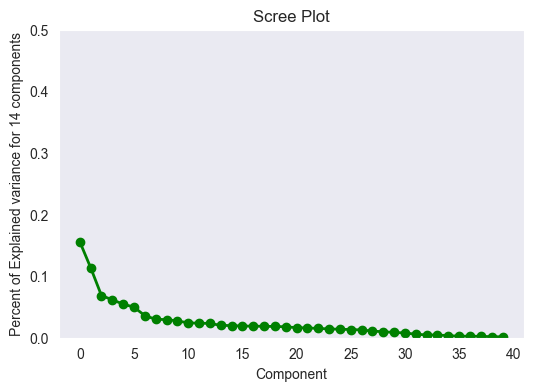

In [139]:
# Create a scree plot for the alternative PCA approach
fig, ax = plt.subplots(figsize = (6, 4))

# Plot the explained variance ratio for each component
ax.plot(pca40.explained_variance_ratio_, 'o-', linewidth=2, color='green')

# Set plot labels and title
ax.set(
    xlabel = 'Component',
    ylabel = 'Percent of Explained variance for 14 components',
    title = 'Scree Plot',
    ylim = (0,.5)    
      );

ax.grid()


### Alternative Approach: Cumulative Variance Plot
Let's examine the cumulative explained variance for this alternative approach.


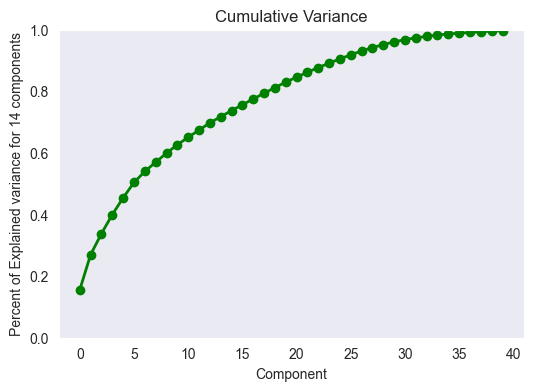

In [140]:
# Create a cumulative variance plot for the alternative PCA approach
fig, ax = plt.subplots(figsize = (6, 4))

# Plot the cumulative explained variance
ax.plot(np.cumsum(pca40.explained_variance_ratio_),  'o-', linewidth=2, color='green')

# Set plot labels and title
ax.set(
    xlabel = 'Component',
    ylabel = 'Percent of Explained variance for 14 components',
    title = 'Cumulative Variance',
    ylim = (0,1)
      );

ax.grid()


### Selecting Components for Alternative Approach
Based on the cumulative variance plot, we'll select 15 components for this alternative approach.


In [141]:
# Apply PCA with 15 components based on our analysis of the alternative approach
pca_15 = PCA(n_components = 15, random_state = 42).fit_transform(df_scaled_2)

# Check the shape of the transformed data
print(pca_15.shape)

(7043, 15)


## Preparing Data for Clustering
Now we'll prepare our final dataset for clustering. We'll:
1. Extract location data for later visualization
2. Create a dataframe with our PCA components
3. Merge the PCA components with our transformed categorical data


In [142]:
# Extract location data for later visualization
Location = pd.DataFrame(columns=["Latitude", "Longitude","Zip Code"])
Location['Latitude'] = df['Latitude'] 
Location['Longitude'] = df['Longitude'] 
Location['Zip Code'] = df['Zip Code'] 


### Creating the Final Dataset for Clustering
We'll now combine our transformed categorical variables with the PCA components to create our final dataset for clustering.


In [143]:
# Create a dataframe with the 5 PCA components
df_pca_5 = pd.DataFrame(pca_5, columns=['PC0', 'PC1', 'PC2', 'PC3', 'PC4'])

# Merge the PCA components with the transformed categorical data                      
data_inputs = df_cat_transformed.reset_index().merge(df_pca_5.reset_index(),
                                                     on = 'index',
                                                     how = 'inner').set_index('index')


### Examining the Final Dataset
Let's examine our final dataset that will be used for clustering.


In [144]:
# Preview the first 3 rows of the final dataset
data_inputs.head(3)


,Referred a Friend,Offer,Phone Service,Multiple Lines,Internet Service,Internet Type,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,...,Latitude,Longitude,Churn Category,Churn Reason,Customer Satisfaction,PC0,PC1,PC2,PC3,PC4
index,,,,,,,,,,,,,,,,,,,,,
0,0,5,0,0,1,2,0,0,1,0,...,34.023810,-118.156582,1,5,5,-2.360960,0.632671,1.152928,-1.745588,0.782841
1,1,4,1,1,1,0,0,1,0,0,...,34.044271,-118.185237,1,3,5,-0.761966,0.960261,1.679621,0.764178,1.158060
2,0,3,1,1,1,2,0,0,0,0,...,34.108833,-118.229715,1,3,5,-0.267381,0.745950,-1.239184,-1.485653,0.996588


In [145]:
# Check the structure of the final dataset
data_inputs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Referred a Friend       7043 non-null   int64  
 1   Offer                   7043 non-null   int64  
 2   Phone Service           7043 non-null   int64  
 3   Multiple Lines          7043 non-null   int64  
 4   Internet Service        7043 non-null   int64  
 5   Internet Type           7043 non-null   int64  
 6   Online Security         7043 non-null   int64  
 7   Online Backup           7043 non-null   int64  
 8   Device Protection Plan  7043 non-null   int64  
 9   Premium Tech Support    7043 non-null   int64  
 10  Streaming TV            7043 non-null   int64  
 11  Streaming Movies        7043 non-null   int64  
 12  Streaming Music         7043 non-null   int64  
 13  Unlimited Data          7043 non-null   int64  
 14  Contract                7043 non-null   int64

## Clustering Model Implementation
Now we'll implement multiple clustering algorithms to segment our customers. We'll use:
1. K-means with 2 clusters
2. K-means with 3 clusters
3. DBSCAN (Density-Based Spatial Clustering of Applications with Noise)

Using multiple clustering algorithms allows us to compare different approaches and select the most meaningful segmentation.


In [146]:
# Initialize the clustering models
kmeans_2 = KMeans(random_state = 42, n_clusters = 2)  # K-means with 2 clusters
kmeans_3 = KMeans(random_state = 42, n_clusters = 3)  # K-means with 3 clusters
dbscan = DBSCAN(eps = 3, min_samples = 5)  # DBSCAN with epsilon=3 and min_samples=5


### Fitting the Clustering Models
Now we'll fit each clustering model to our data and extract the cluster labels.


In [147]:
# Fit K-means with 2 clusters and extract labels
kmeans_2_labels = pd.DataFrame(kmeans_2.fit(data_inputs).labels_).rename({0:'KM2_Label'}, axis = 1)

# Fit K-means with 3 clusters and extract labels
kmeans_3_labels = pd.DataFrame(kmeans_3.fit(data_inputs).labels_).rename({0:'KM3_Label'}, axis = 1)

# Fit DBSCAN and extract labels
dbscan_labels = pd.DataFrame(dbscan.fit(data_inputs).labels_).rename({0:'DBSCAN_Label'}, axis = 1)


### Examining Cluster Labels
Let's examine the cluster labels from our K-means model with 2 clusters.


In [148]:
# Preview the K-means with 2 clusters labels
kmeans_2_labels


,KM2_Label
0,0
1,0
2,0
3,0
4,0
...,...
7038,0
7039,0
7040,0
7041,0


### Combining Cluster Labels
Now we'll combine the labels from all three clustering models into a single dataframe for comparison.


In [149]:
# Merge K-means with 2 clusters and K-means with 3 clusters labels
tempdf = kmeans_2_labels.reset_index().merge(
                      right = kmeans_3_labels.reset_index(),
                      how = 'inner',
                      right_on = 'index', left_on = 'index'
                                            )
# Add DBSCAN labels to the combined dataframe
all_labels = tempdf.merge(
                      right = dbscan_labels.reset_index(),
                      how = 'inner',
                      right_on = 'index', left_on = 'index'
                         )
# Preview the combined labels
all_labels.head(2)


,index,KM2_Label,KM3_Label,DBSCAN_Label
0,0,0,0,-1
1,1,0,0,-1


### Creating the Final Dataset with Cluster Labels
Now we'll merge the cluster labels with the original dataset to create our final dataset for analysis and visualization.


In [150]:
# Merge cluster labels with the original dataset
df_all = all_labels.merge(
                      right = df.reset_index(),
                      how = 'inner',
                      right_on = 'index', left_on = 'index'
                         )
# Preview the final dataset
df_all.head(3)


,index,KM2_Label,KM3_Label,DBSCAN_Label,Customer ID,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,...,Latitude,Longitude,Population,Churn Value,CLTV,Churn Category,Churn Reason,Total Customer Svc Requests,Product/Service Issues Reported,Customer Satisfaction
0,0,0,0,-1,6207,0,0,1,5,0,...,34.023810,-118.156582,68701,1,5433,1,5,5,0,5
1,1,0,0,-1,5305,1,1,8,4,1,...,34.044271,-118.185237,55668,1,5302,1,3,5,0,5
2,2,0,0,-1,1129,0,0,18,3,1,...,34.108833,-118.229715,47534,1,3179,1,3,1,0,5


In [151]:
# Check the structure of the final dataset with cluster labels
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 50 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   index                              7043 non-null   int64  
 1   KM2_Label                          7043 non-null   int32  
 2   KM3_Label                          7043 non-null   int32  
 3   DBSCAN_Label                       7043 non-null   int64  
 4   Customer ID                        7043 non-null   int64  
 5   Referred a Friend                  7043 non-null   int64  
 6   Number of Referrals                7043 non-null   int64  
 7   Tenure in Months                   7043 non-null   int64  
 8   Offer                              7043 non-null   int64  
 9   Phone Service                      7043 non-null   int64  
 10  Avg Monthly Long Distance Charges  7043 non-null   float64
 11  Multiple Lines                     7043 non-null   int64

## Cluster Visualization and Analysis
Now we'll visualize our clusters to understand the patterns and relationships between different customer segments. We'll create several visualizations to explore how the clusters relate to different variables.


### Visualizing Clusters by Churn Value and Location
First, let's examine how our K-means clusters with 3 segments relate to customer churn and geographical location.


<Axes: xlabel='Churn Value', ylabel='Longitude'>

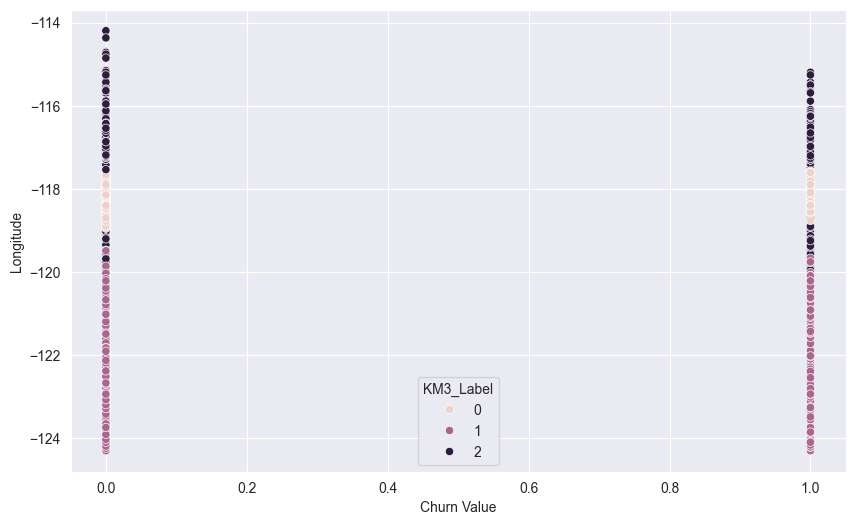

In [152]:
# Create a scatter plot of Churn Value vs. Longitude colored by K-means clusters
plt.figure(figsize = (10, 6))

sns.scatterplot(data = df_all,
                x = 'Churn Value',
                y = 'Longitude',
                hue = 'KM3_Label'
               )


### Visualizing Geographical Distribution of Clusters
Now let's visualize how our clusters are distributed geographically by plotting Latitude vs. Longitude.


<Axes: xlabel='Latitude', ylabel='Longitude'>

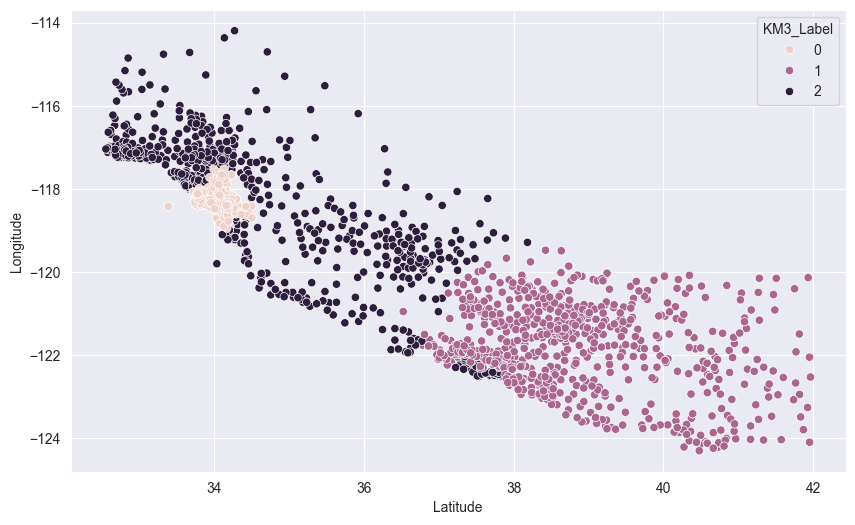

In [153]:
# Create a scatter plot of Latitude vs. Longitude colored by K-means clusters
plt.figure(figsize = (10, 6))

sns.scatterplot(data = df_all,
                x = 'Latitude',
                y = 'Longitude',
                hue = 'KM3_Label'
               )


### Interactive Geographical Visualization
Finally, let's create an interactive geographical visualization using Plotly to better understand the spatial distribution of our customer segments.


In [154]:
# Create an interactive geographical scatter plot colored by K-means clusters
px.scatter_geo(data_frame = df_all,
               lat = 'Latitude',
               lon = 'Longitude',
               color = 'KM3_Label'
              )


## Conclusion
In this notebook, we've performed customer segmentation for a telecommunications company using PCA and clustering techniques. We:

1. Loaded and explored the customer data
2. Applied PCA to reduce dimensionality while preserving important information
3. Transformed categorical variables for use in our models
4. Applied multiple clustering algorithms (K-means with 2 and 3 clusters, and DBSCAN)
5. Visualized the resulting clusters to understand customer segments

The visualizations reveal distinct customer segments with different geographical distributions and churn patterns. These insights can help the telecommunications company develop targeted marketing strategies and retention programs for different customer segments.
